<a href="https://colab.research.google.com/github/veronikaangyal/Wine-Quality-Prediction-ML/blob/main/Wine_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## *Data collection and Analysis*

In [2]:
# importing dataset through url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_dataset = pd.read_csv(url, sep=';')

In [3]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Description of Chemical Features**
- `Fixed Acidity`	- Non-volatile acids (tartaric) related to wine structure.
- `Volatile Acidity` -	Acetic acid content; high levels lead to unpleasant vinegar taste.
- `Citric Acid` -	Adds freshness and flavor to wines.
- `Residual Sugar` - Amount of sugar remaining after fermentation stops.
- `Chlorides` -	Amount of salt in the wine.
- `Free Sulfur Dioxide` -	Prevents microbial growth and oxidation of wine.
- `Total Sulfur Dioxide` -	Amount of free + bound forms of S02.
- `Density` -	Density of water is close to 1; depending on the percent alcohol and sugar content.
- `pH` -	Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic).
- `Sulphates` -	A wine additive which can contribute to sulfur dioxide gas (S02) levels.
- `Alcohol` -	The percent alcohol content of the wine.
- `Quality` (Target) - 	Score between 0 and 10 given by human wine tasters.


In [4]:
# showing first 5 rows of data set
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# find out if we have null values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
# statistics about dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# **Exploratory Data Analysis**

Overview of Quality Distribution

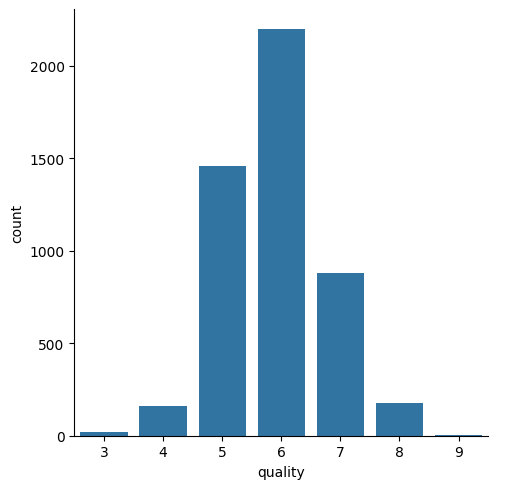

In [7]:
# value distribution for each quality score
sns.catplot(x='quality', data=wine_dataset, kind='count')

### Chemical Feature Visualisation

<Axes: xlabel='quality', ylabel='fixed acidity'>

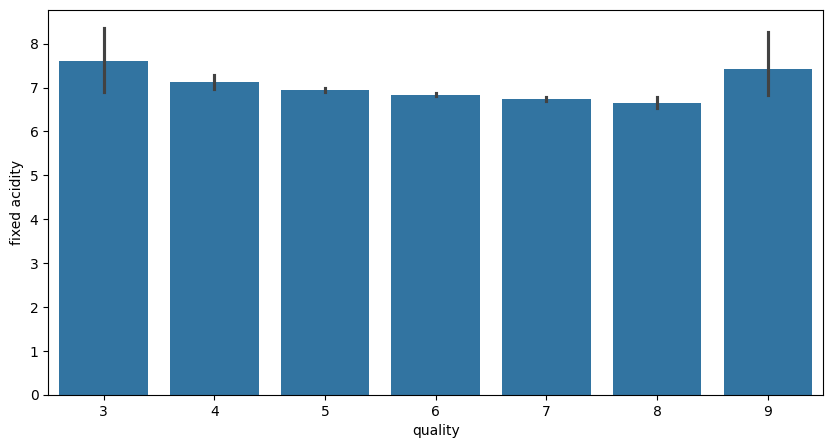

In [8]:
# fixed acidity vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='fixed acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='volatile acidity'>

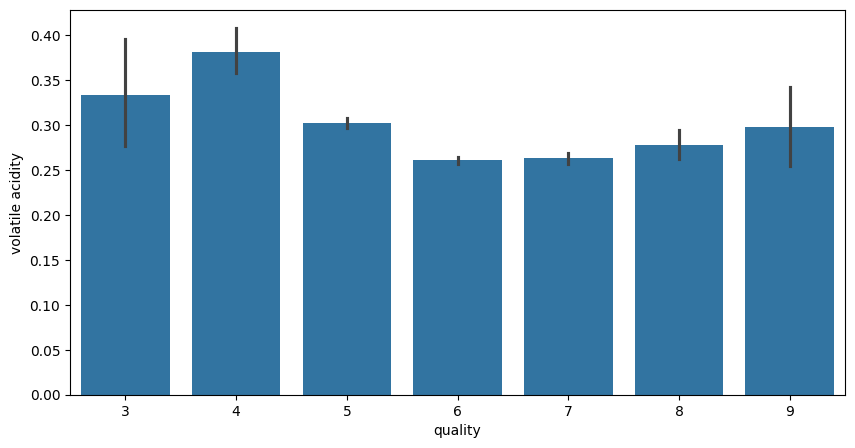

In [9]:
# volatile acidity vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

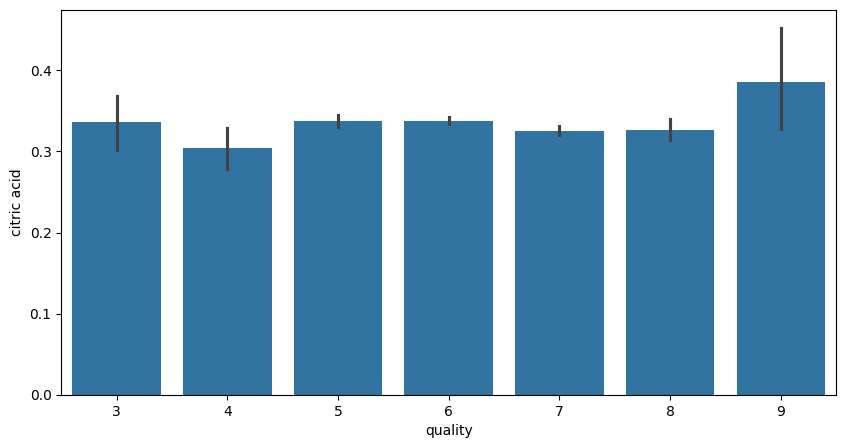

In [10]:
# citric acid vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

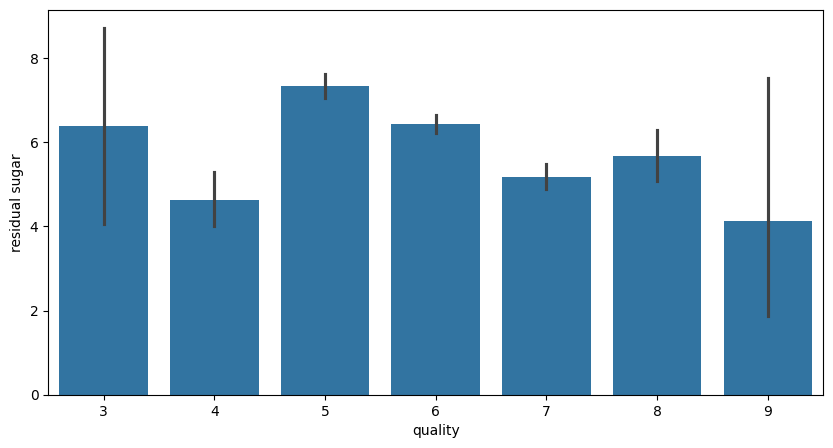

In [11]:
# residual sugar vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

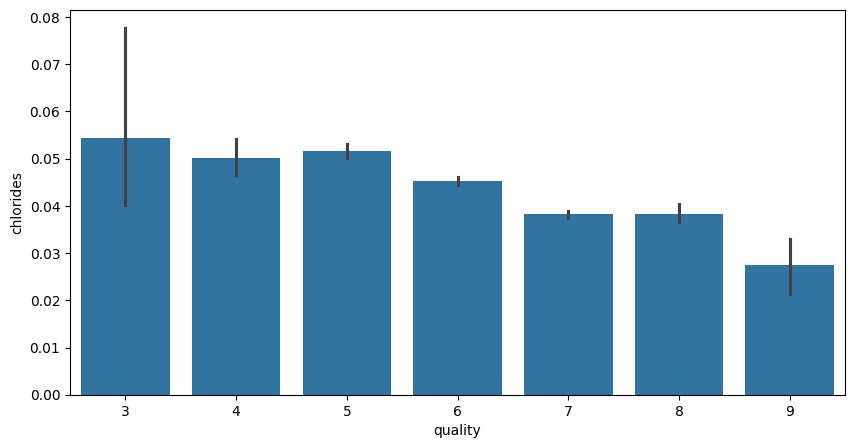

In [12]:
# chlorides vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

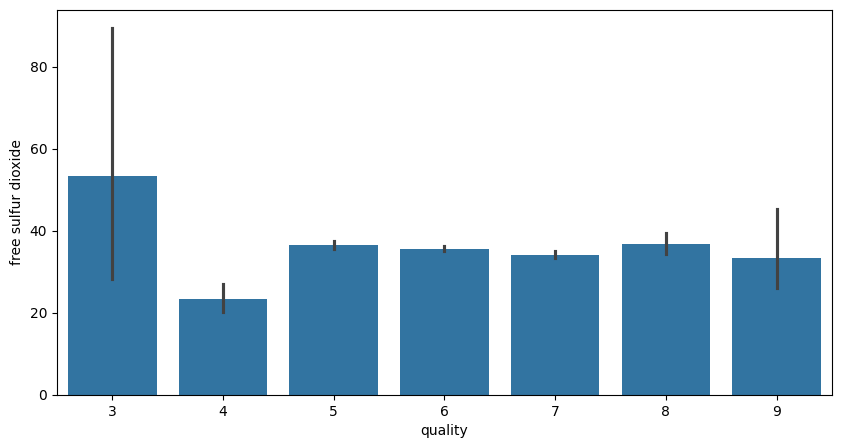

In [13]:
# free sulfur dioxide vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine_dataset)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

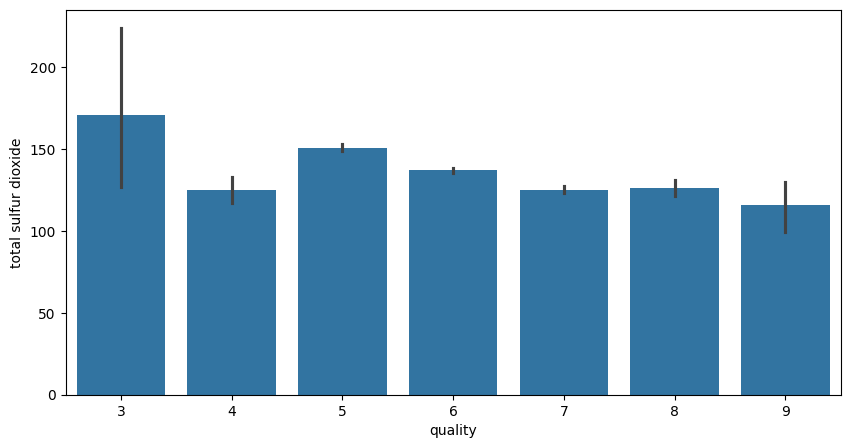

In [14]:
# total sulfur dioxide vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine_dataset)

<Axes: xlabel='quality', ylabel='density'>

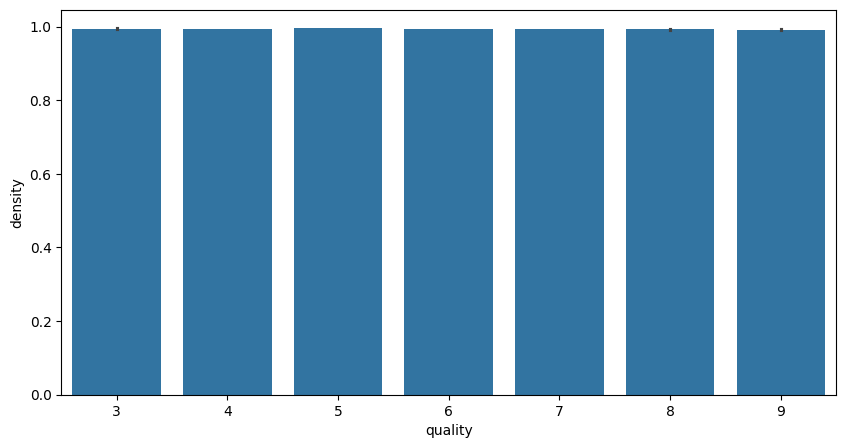

In [15]:
# density vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='density', data=wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

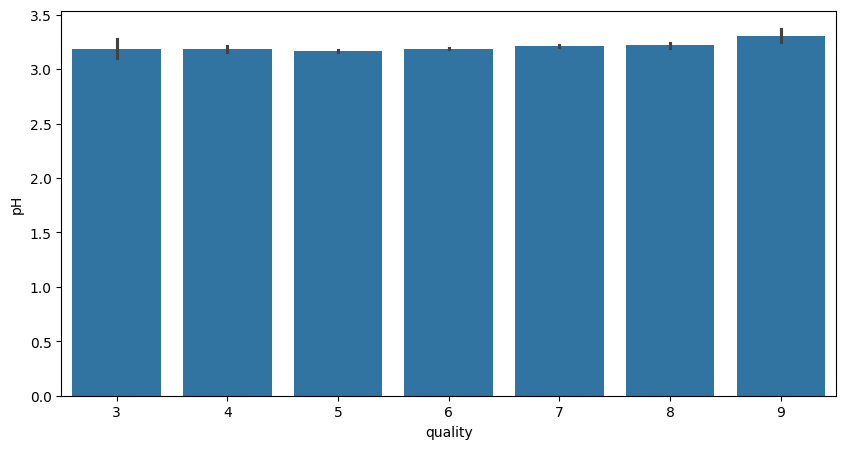

In [16]:
# pH vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='pH', data=wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

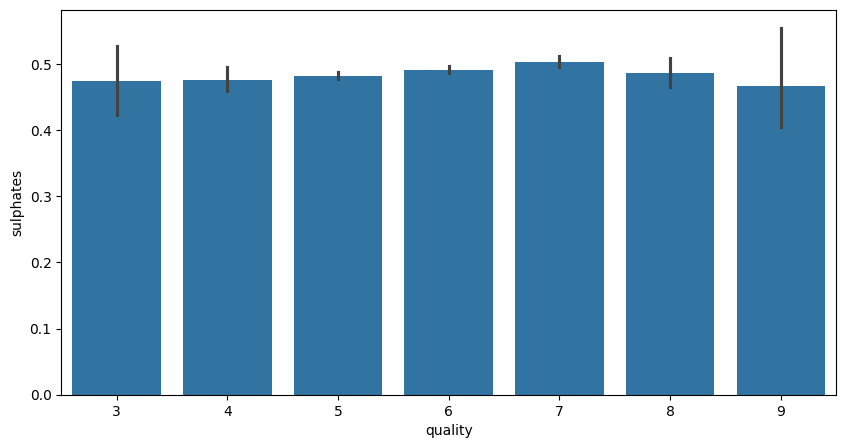

In [17]:
# sulphates vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='sulphates', data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

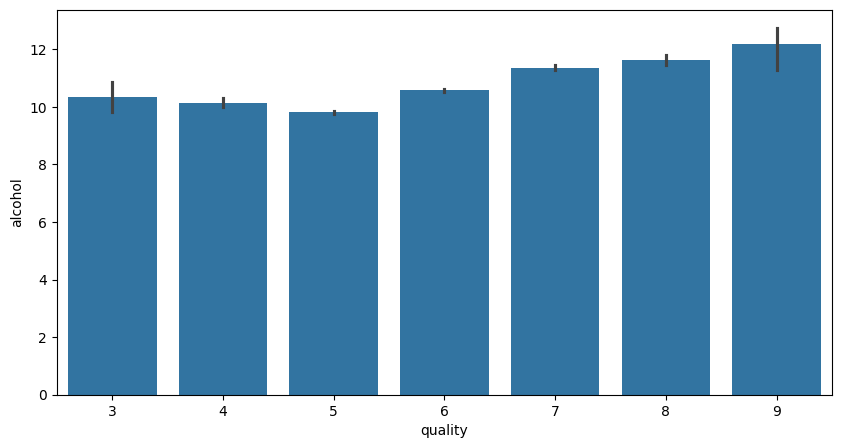

In [18]:
# alcohol vs quality
plot = plt.figure(figsize=(10,5))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)

### Feature Corellation Matrix

<Axes: >

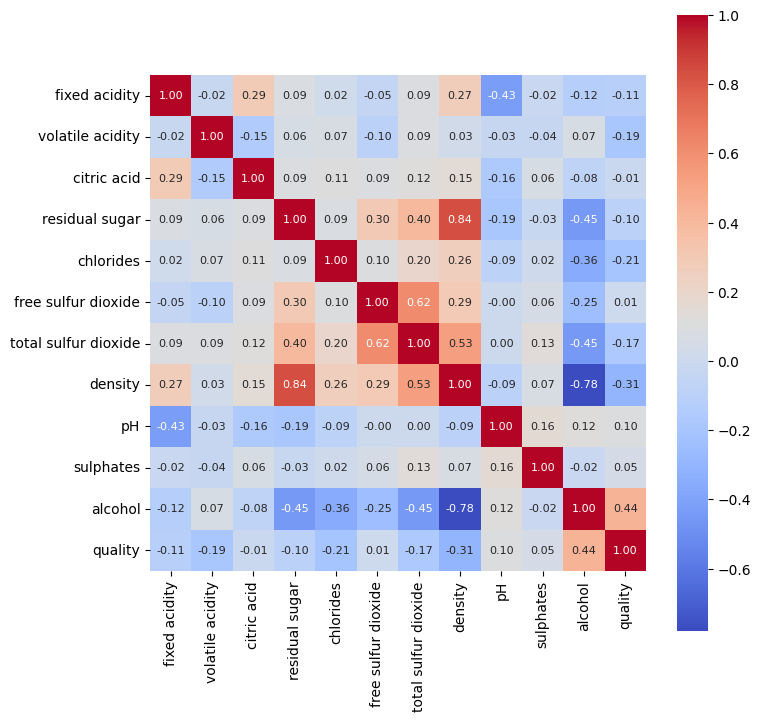

In [19]:
corellation = wine_dataset.corr()

# heat map to understatnd corellation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(corellation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='coolwarm')



# **Random Forest Classification**

## *Binary classification (Good vs. Bad)*

Data Preprocessing

In [20]:
# separate the data and label
X = wine_dataset.drop('quality', axis=1)

In [21]:
# label binarization
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [22]:
# train and test split
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(Y.shape, Y_train_b.shape, Y_test_b.shape)

(4898,) (3918,) (980,)


Random Forest Alghorithm

In [24]:
model = RandomForestClassifier()
model.fit(X_train_b, Y_train_b)

RandomForestClassifier()

Model evaluation using Accuracy score



In [25]:
# accuracy on test data
X_test_prediction = model.predict(X_test_b)
test_data_accuracy_b = accuracy_score(X_test_prediction, Y_test_b)

In [26]:
print('Accuracy:', test_data_accuracy_b)

Accuracy: 0.8795918367346939


Predictive system

In [27]:
# quality = 6 => bad quality wine
input_data = (8.1,	0.28,	0.40,	6.9,	0.050,	30.0,	97.0,	0.9951,	3.26,	0.44,	10.1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the balel for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good quality wine')
else:
  print('Bad quality wine')

[0]
Bad quality wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
# quality = 8 => good quality wine
input_data = (6.7, 0.23, 0.31, 2.1, 0.046, 30.0, 96.0, 0.9926, 3.33, 0.64, 10.7)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good quality wine')
else:
  print('Bad quality wine')

[1]
Good quality wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## *Multi-class classification (Good/Average/Bad)*

In [29]:
X_m = wine_dataset.drop('quality', axis=1)
Y_m = wine_dataset['quality'].apply(lambda y_value: 0 if y_value<=5 else (1 if y_value==6 else 2))
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.2, random_state=2)

In [30]:
model_m = RandomForestClassifier()
model_m.fit(X_train_m, Y_train_m)

RandomForestClassifier()

Model evaluation using Accuracy score

In [31]:
# accuracy on test data
X_test_prediction_m = model_m.predict(X_test_m)
test_data_accuracy_m = accuracy_score(X_test_prediction_m, Y_test_m)

In [32]:
print('Accuracy:', test_data_accuracy_m)

Accuracy: 0.6908163265306122


Predictive system

In [33]:
# quality = 6 => average quality wine
input_data = (8.1,	0.28,	0.40,	6.9,	0.050,	30.0,	97.0,	0.9951,	3.26,	0.44,	10.1)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the balel for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_m.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Bad quality wine')
elif (prediction[0]==2):
  print('Average quality wine')
else:
  print('Good quality wine')


[1]
Good quality wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
# quality = 8 => good quality wine
input_data = (6.7, 0.23, 0.31, 2.1, 0.046, 30.0, 96.0, 0.9926, 3.33, 0.64, 10.7)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Bad quality wine')
elif (prediction[0]==2):
  print('Average quality wine')
else:
  print('Good quality wine')

[1]
Good quality wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
# quality = 4 => bad quality wine
input_data = (7.6, 0.48, 0.37, 0.8, 0.037, 4, 100, 0.9902, 3.03, 0.39, 11.4)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Bad quality wine')
elif (prediction[0]==2):
  print('Average quality wine')
else:
  print('Good quality wine')

[0]
Bad quality wine


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Random Forest Regression**

In [36]:
# making new sets because we are keeping the original scores
X_reg = wine_dataset.drop('quality', axis=1)
Y_reg = wine_dataset['quality']

In [37]:
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=2)

In [38]:
reg_model = RandomForestRegressor()
reg_model.fit(X_train_r, Y_train_r)

RandomForestRegressor()

In [39]:
reg_predictions = reg_model.predict(X_test_r)

In [40]:
mse = mean_squared_error(Y_test_r, reg_predictions)
r2 = r2_score(Y_test_r, reg_predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 0.4023108163265306
R2 Score: 0.48171720149859365


Predictive system

In [41]:
# quality = 6
input_data = (8.1, 0.28, 0.40, 6.9, 0.050, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = reg_model.predict(input_data_reshaped)

print("Predicted Score:", prediction[0])

Predicted Score: 5.87


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [42]:
rounded_prediction = round(prediction[0])
print("Rounded Prediction:", int(rounded_prediction))

Rounded Prediction: 6


In [43]:
# quality = 4
input_data = (7.6, 0.48, 0.37, 0.8, 0.037, 4, 100, 0.9902, 3.03, 0.39, 11.4)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = reg_model.predict(input_data_reshaped)

print("Predicted Score:", prediction[0])

rounded_prediction = round(prediction[0])
print("Rounded Prediction:", int(rounded_prediction))

Predicted Score: 4.32
Rounded Prediction: 4


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
